In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
df = pd.read_csv("glassdoor_datascience_salaries_cleaned.csv")

In [148]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,job_state,job_city,same_state_as_hq,company_age,python_yn,spark_yn,cloud_yn,deployments_yn,viz_tools_yn,api_dev_yn
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,NM,Albuquerque,False,51,True,False,False,False,True,False
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,MD,Linthicum,False,40,True,False,False,False,False,False
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,FL,Clearwater,True,14,True,True,False,False,False,False
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,WA,Richland,True,59,True,False,False,False,False,False
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,NY,New York,True,26,True,False,False,False,False,False


In [149]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'job_city', 'same_state_as_hq',
       'company_age', 'python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn'],
      dtype='object')

In [150]:
print(df['Job Title'].value_counts())

Job Title
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: count, Length: 264, dtype: int64


In [151]:
# Job title and seniority

def job_title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'Gen AI' in title.lower():
        return 'AI engineer'
    else:
        return 'na'
    

def seniority (title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

    


In [152]:
df['job_title_simplified'] = df['Job Title'].apply(job_title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

In [153]:
# Fix state Los Angeles    
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [154]:
# Job Description Length
df['jd_length'] = df['Job Description'].apply(lambda x: len(x))

In [155]:
# Competitors Count

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [156]:
# Hourly wage to annual wage

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly else x.max_salary, axis = 1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary*2 if x.hourly else x.avg_salary, axis = 1)

In [157]:
df.company_text

0                          Tecolote Research\r\n
1      University of Maryland Medical System\r\n
2                                    KnowBe4\r\n
3                                       PNNL\r\n
4                         Affinity Solutions\r\n
                         ...                    
737                                      GSK\r\n
738                               Eventbrite\r\n
739           Software Engineering Institute\r\n
740                             Numeric, LLC\r\n
741             Riverside Research Institute\r\n
Name: company_text, Length: 742, dtype: object

In [158]:
# remove \n from job title

df['company_text'] = df['company_text'].apply(lambda x: x.replace('\n','').replace('\r',''))

In [159]:
df.describe()

,Unnamed: 0,Rating,Founded,min_salary,max_salary,avg_salary,company_age,jd_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,74.719677,128.149596,101.434636,50.322102,3910.172507,1.053908
std,279.793117,0.801210,497.183763,30.980593,45.220324,37.546122,54.026459,1533.827777,1.384239
min,0.000000,-1.000000,-1.000000,15.000000,16.000000,15.500000,-1.000000,407.000000,0.000000
25%,221.500000,3.300000,1939.000000,52.000000,96.000000,73.500000,15.000000,2834.000000,0.000000
50%,472.500000,3.700000,1988.000000,69.500000,124.000000,97.500000,28.000000,3781.500000,0.000000
75%,707.750000,4.000000,2007.000000,91.000000,155.000000,122.500000,63.000000,4772.000000,3.000000
max,955.000000,5.000000,2019.000000,202.000000,306.000000,254.000000,280.000000,10146.000000,4.000000


<AxesSubplot:>

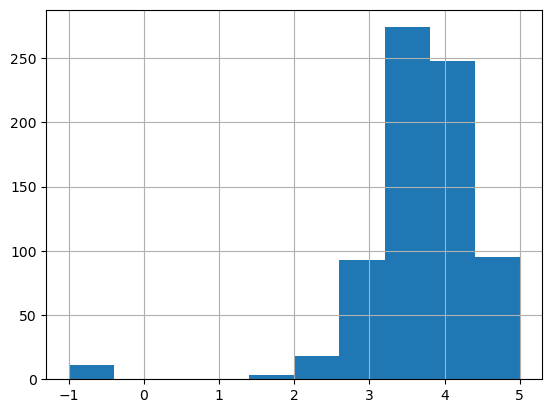

In [160]:
df.Rating.hist()

<AxesSubplot:>

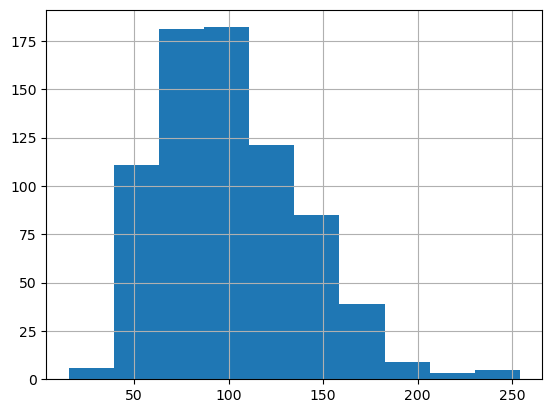

In [161]:
df.avg_salary.hist()

<AxesSubplot:>

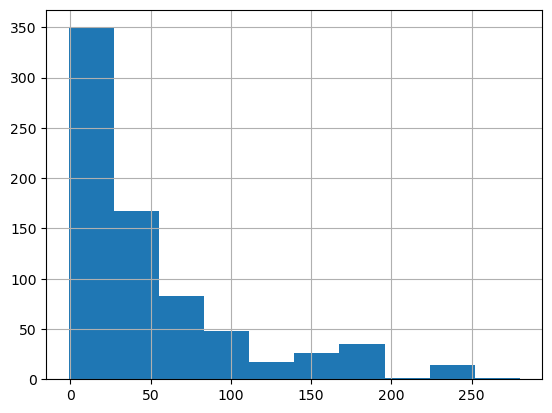

In [162]:
df.company_age.hist()

<AxesSubplot:>

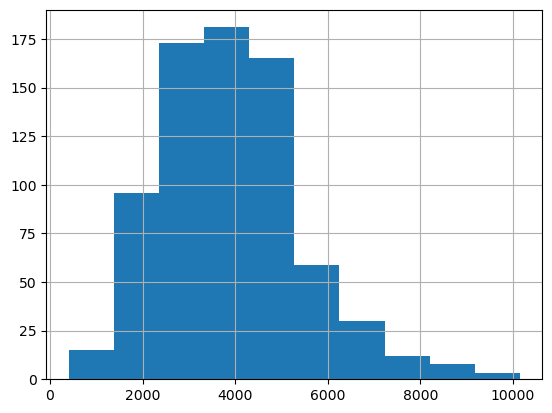

In [163]:
df.jd_length.hist()

<AxesSubplot:>

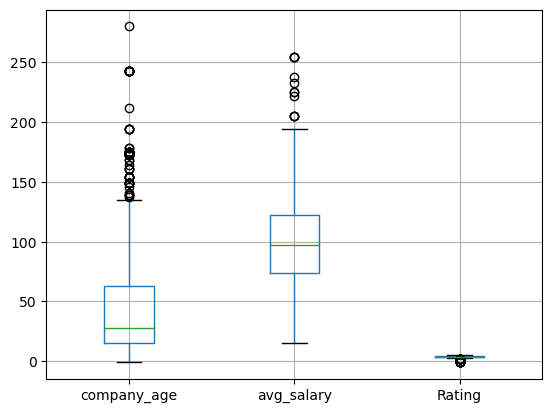

In [164]:
df.boxplot(column = ['company_age','avg_salary','Rating'])

<AxesSubplot:>

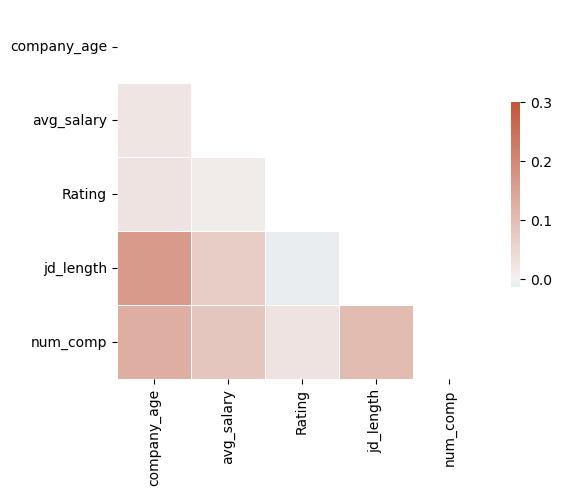

In [165]:
corr = df[['company_age','avg_salary','Rating','jd_length','num_comp']].corr()

import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [166]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'job_city', 'same_state_as_hq',
       'company_age', 'python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn', 'job_title_simplified', 'seniority',
       'jd_length', 'num_comp'],
      dtype='object')

In [167]:
#separating categorical cols to analyze

df_categorical = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_text', 'job_state','python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn', 'job_title_simplified', 'seniority']]

Chart for Location: total = 200


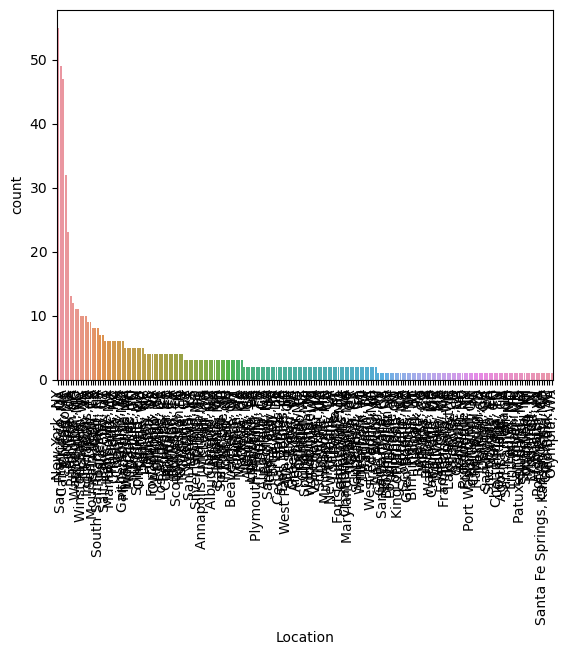

Chart for Headquarters: total = 198


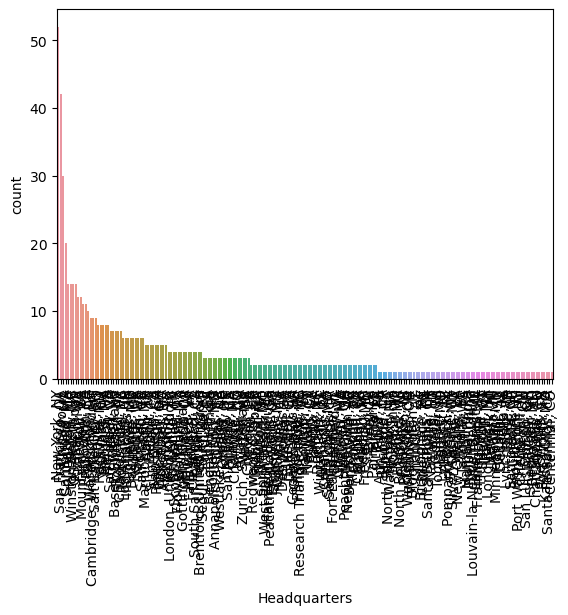

Chart for Size: total = 9


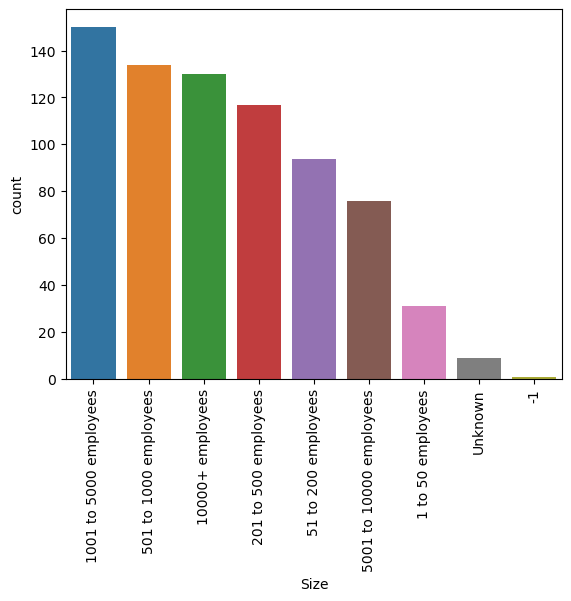

Chart for Type of ownership: total = 11


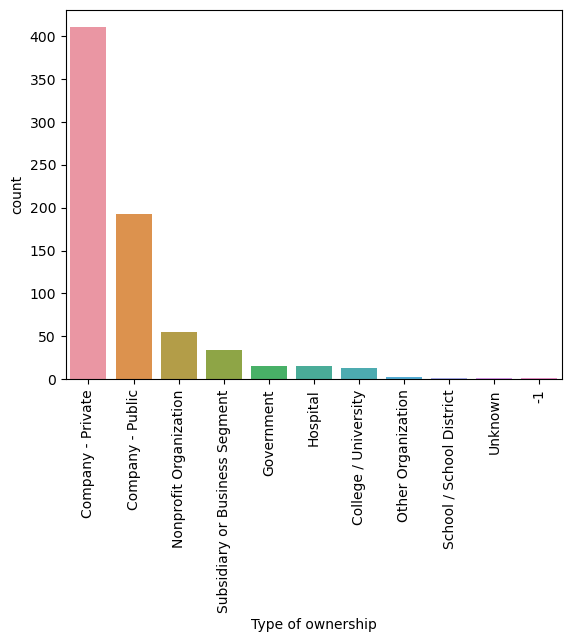

Chart for Industry: total = 60


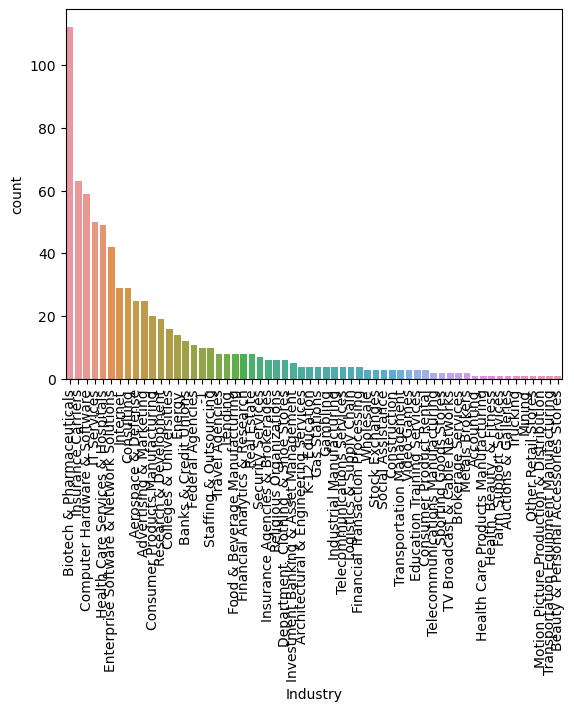

Chart for Sector: total = 25


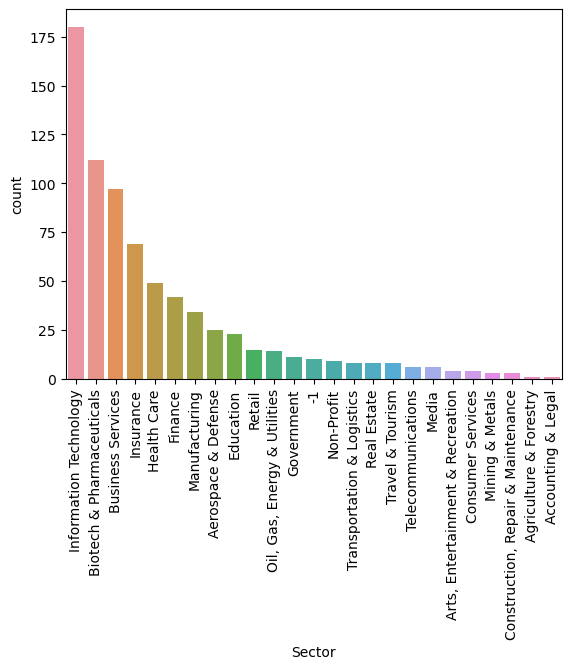

Chart for Revenue: total = 14


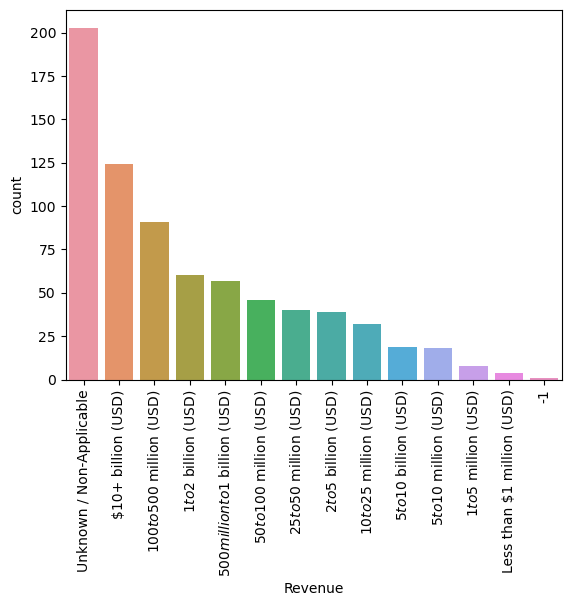

Chart for company_text: total = 343


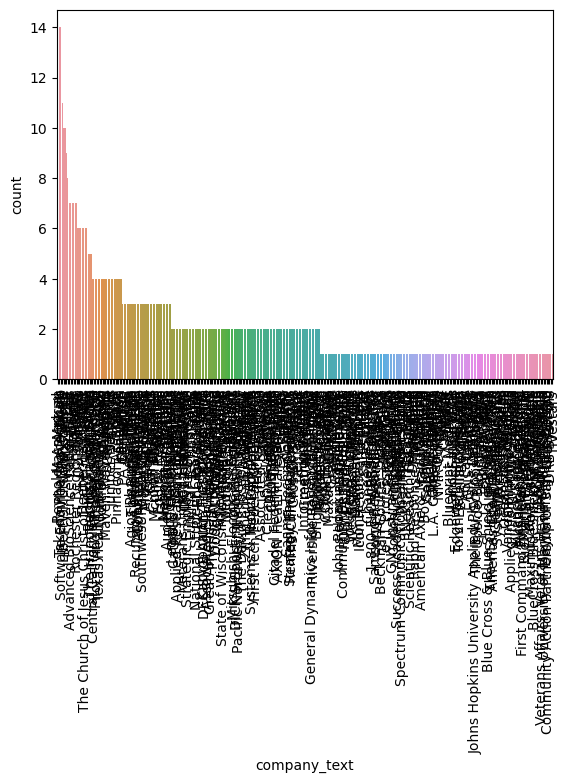

Chart for job_state: total = 37


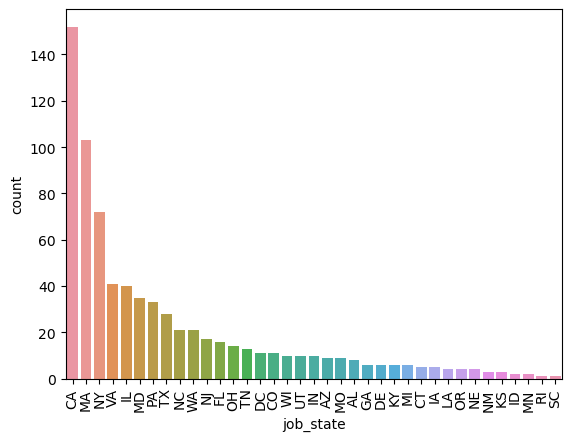

Chart for python_yn: total = 2


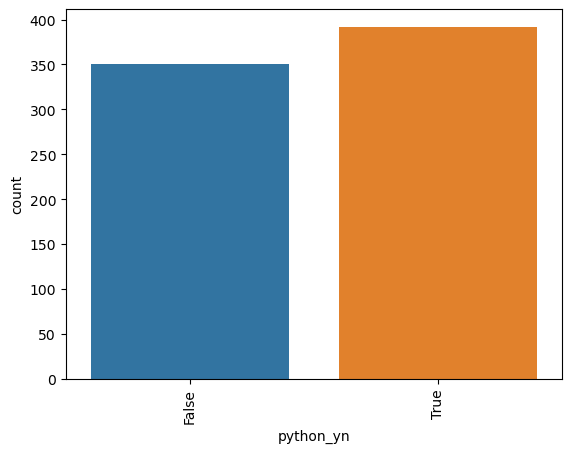

Chart for spark_yn: total = 2


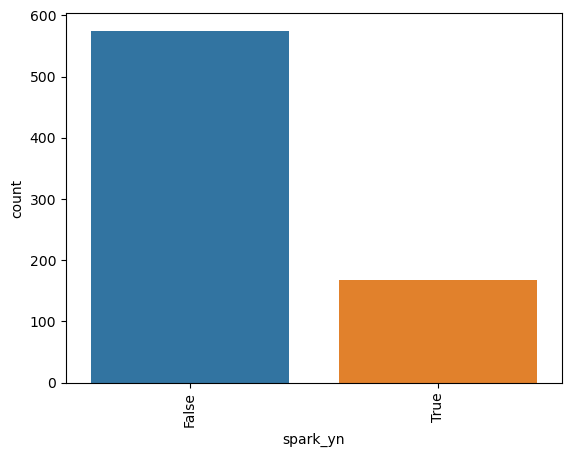

Chart for cloud_yn: total = 2


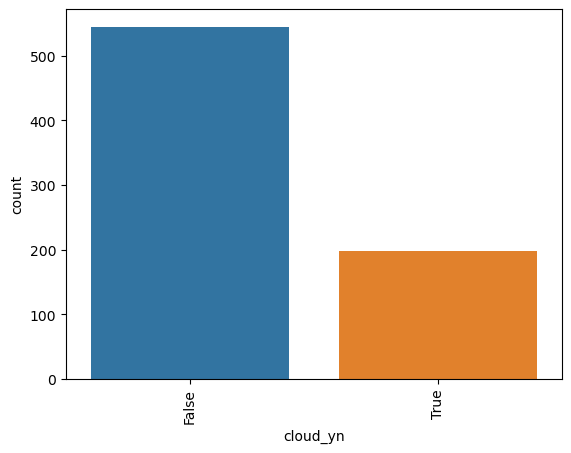

Chart for deployments_yn: total = 2


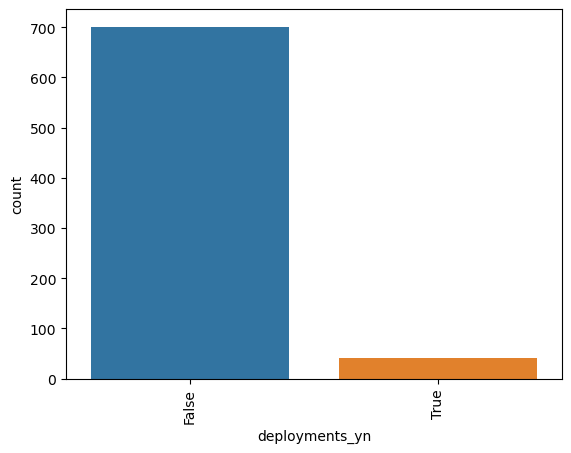

Chart for viz_tools_yn: total = 2


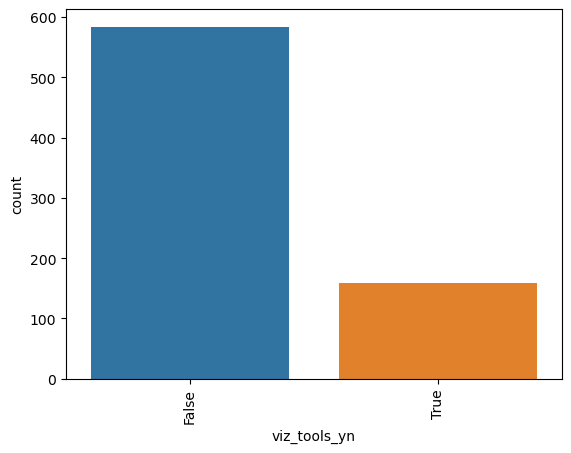

Chart for api_dev_yn: total = 2


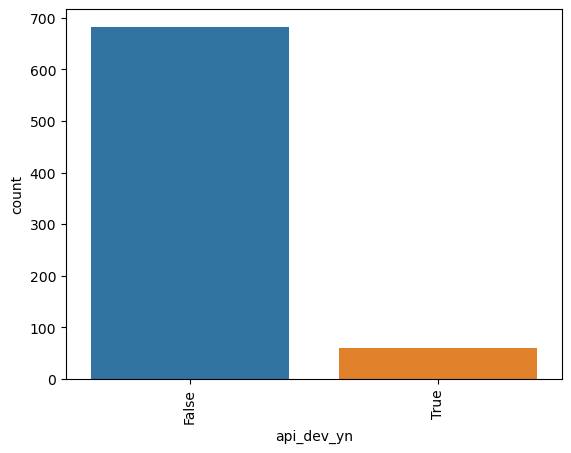

Chart for job_title_simplified: total = 7


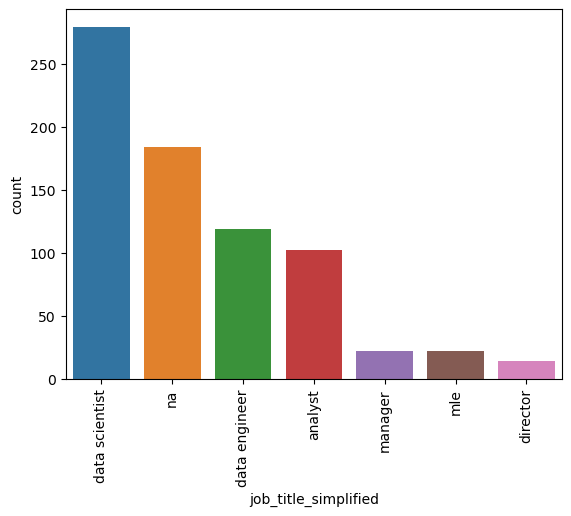

Chart for seniority: total = 3


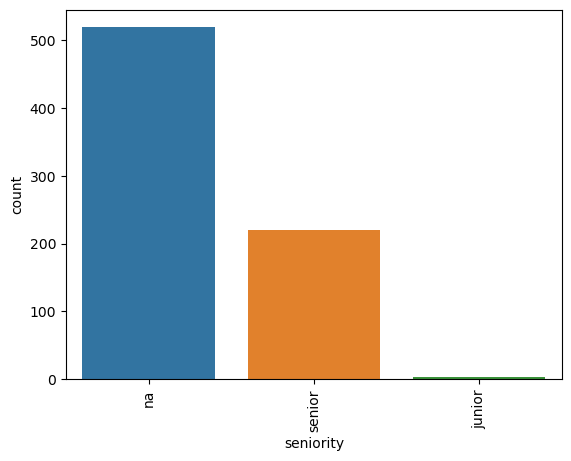

In [168]:
for col in df_categorical.columns:
    category_count = df_categorical[col].value_counts()
    print('Chart for %s: total = %d' % (col, len(category_count)))
    chart = sns.barplot(x = category_count.index,y = category_count)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

Chart for Location: total = 20


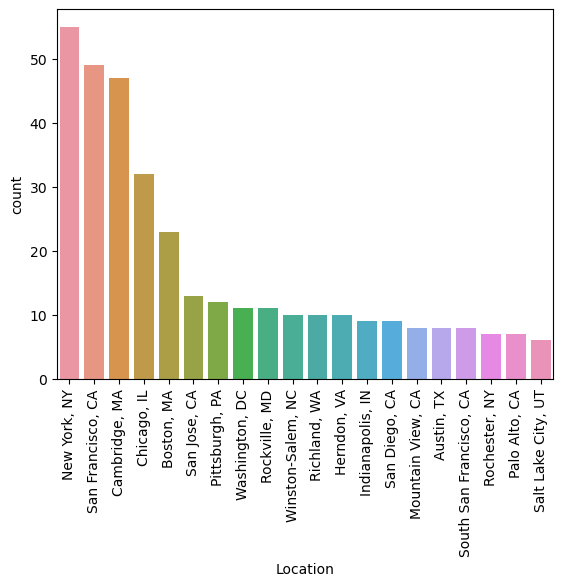

Chart for Headquarters: total = 20


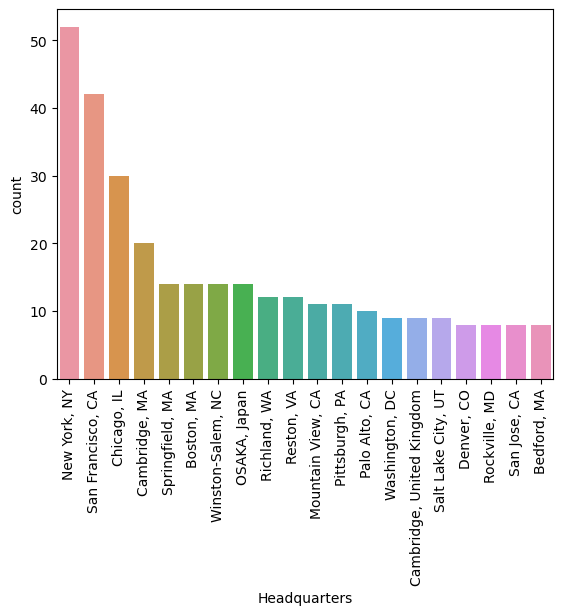

Chart for company_text: total = 20


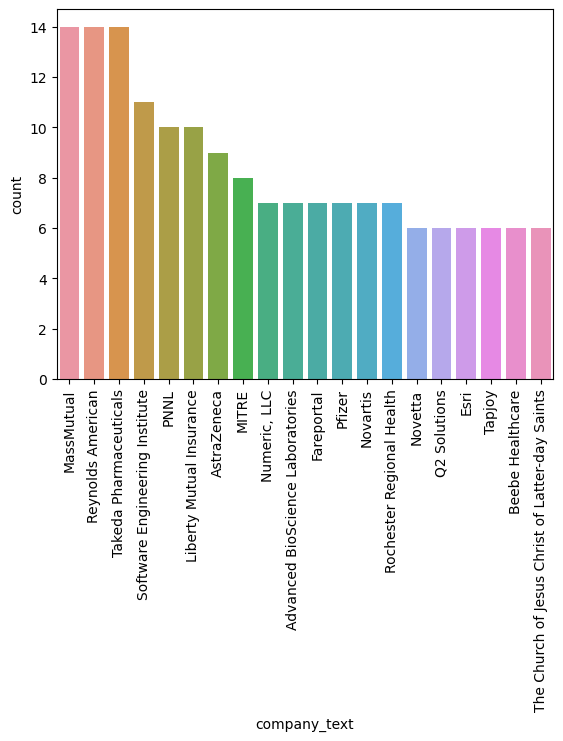

In [169]:
for col in df_categorical[['Location','Headquarters','company_text']].columns:
    category_count = df_categorical[col].value_counts()[:20]
    print('Chart for %s: total = %d' % (col, len(category_count)))
    chart = sns.barplot(x = category_count.index,y = category_count)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [171]:
pd.pivot_table(df, index = ['job_title_simplified'], columns=['seniority'], values='avg_salary').sort_values('avg_salary', ascending=False)


KeyError: 'avg_salary'

In [ ]:
# Salary x [rating, industry, sector, rev, nom of comps, hourly, emp_provided, skills, jd_length, type of ownership]

df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','num_comp','hourly', 'employer_provided','python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn','jd_length','Type of ownership','avg_salary','job_title_simplified','seniority']]

In [ ]:
for col in df_pivots.columns:
     
     if col != 'avg_salary':
          print(col)
          print(pd.pivot_table(df_pivots, index = col, values = 'avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [ ]:
pd.pivot_table(df_pivots, index = ['job_title_simplified','seniority'],values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_title_simplified seniority            
director             na         168.607143
mle                  senior     142.071429
data scientist       senior     138.956522
data engineer        senior     124.689189
mle                  na         119.133333
na                   senior     109.061404
data scientist       na         107.043011
                     junior     106.500000
data engineer        na          96.701220
manager              na          84.022727
analyst              senior      80.092593
na                   na          78.500000
analyst              na          61.308219
                     junior      53.250000

#### Some NLP to parse the Job Description and find most used words

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

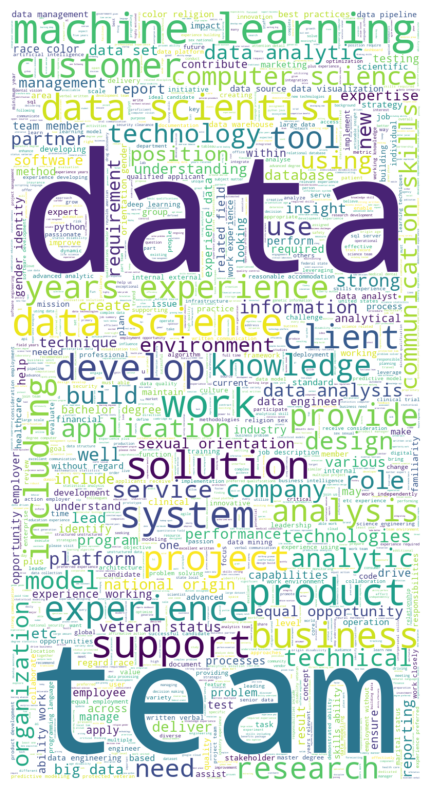

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('explored_data_for_model.csv')

In [ ]:
#exporting to tableau for exploratory dashboard
df.to_excel('final_data_for_model.xlsx', index=False)

In [ ]:
grouped_df = df.groupby('Sector').agg({
    'avg_salary': 'mean',
    'Rating': 'mean',
    'Job Title': 'size'
}).reset_index()
grouped_df.rename(columns={'Job Title': 'count'}, inplace=True)
grouped_df2 = grouped_df[grouped_df['Sector'] != '-1']


In [ ]:
#Reading and extracting test data
import pandas as pd
test_df = pd.read_csv('flaskAPI/X_test.csv')

In [ ]:
test_df

,Unnamed: 0,Rating,employer_provided,num_comp,hourly,same_state_as_hq,company_age,python_yn,spark_yn,cloud_yn,...,job_title_simplified_analyst,job_title_simplified_data engineer,job_title_simplified_data scientist,job_title_simplified_director,job_title_simplified_manager,job_title_simplified_mle,job_title_simplified_na,seniority_junior,seniority_na,seniority_senior
0,120,4.4,0,0,0,1,25,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,196,3.6,0,0,0,1,38,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,336,3.5,0,3,0,1,14,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,582,3.9,0,0,0,1,12,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,395,4.0,0,2,0,0,17,1,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,69,4.0,0,0,0,0,85,0,0,0,...,0,0,0,0,0,0,1,0,1,0
145,223,3.7,0,3,0,0,243,0,0,0,...,0,0,0,0,0,0,1,0,1,0
146,131,3.2,0,3,0,1,66,1,0,0,...,0,0,1,0,0,0,0,0,1,0
147,44,4.3,0,3,0,1,31,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:

grouped_df = df.groupby('job_state').agg({
    'avg_salary': 'mean',
}).reset_index()

grouped_df

,job_state,avg_salary
0,AL,57.937500
1,AZ,85.666667
2,CA,123.513158
3,CO,85.636364
4,CT,71.100000
5,DC,110.181818
6,DE,55.000000
7,FL,77.625000
8,GA,80.666667
9,IA,78.900000


In [ ]:
df['job_title_simplified'].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'director',
       'manager', 'mle'], dtype=object)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import numpy as np

np.random.seed(0)
categories = ['Category A', 'Category B', 'Category C']
values = np.random.randint(1, 100, size=len(categories))
df = pd.DataFrame({'Category': categories, 'Value': values})


fig_bar = go.Figure(
    data = go.Bar(
    x=df['Category'],
    y=df['Value'],
    marker=dict(color='blue')  # Bar color
))

fig_bar.update_layout(
    title='Bar Chart',
    xaxis={'title': 'Categories'},
    yaxis={'title': 'Values'},
    hovermode='closest'
)


app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1('Bar Chart Example'),

    dcc.Graph(
        id='bar-chart',
        figure=fig_bar
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
scraped = pd.read_csv('data_scraped.csv')

In [182]:
for val in scraped.columns:
    print(val)

Unnamed: 0
Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue
Competitors


In [ ]:
usa = pd.read_csv('/Users/sudhanshuranjan/Documents/dataScience_salaries/Helper Datasets/uscities.csv')

In [ ]:
cities = usa.city.unique()

In [ ]:
states = usa.state_name.unique()

In [ ]:
data = { 'states' : states,'cities': cities}

In [ ]:
for city in data.get('cities'):
    print(city)

New York
Los Angeles
Chicago
Miami
Houston
Dallas
Philadelphia
Atlanta
Washington
Boston
Phoenix
Detroit
Seattle
San Francisco
San Diego
Minneapolis
Tampa
Brooklyn
Denver
Queens
Riverside
Las Vegas
Baltimore
St. Louis
Portland
San Antonio
Sacramento
Austin
Orlando
San Juan
San Jose
Pittsburgh
Indianapolis
Manhattan
Cincinnati
Kansas City
Cleveland
Columbus
Bronx
Virginia Beach
Charlotte
Milwaukee
Providence
Jacksonville
Nashville
Salt Lake City
Raleigh
Richmond
Memphis
Oklahoma City
Hartford
Louisville
Buffalo
New Orleans
Fort Worth
Bridgeport
Tucson
El Paso
Omaha
McAllen
Birmingham
Albuquerque
Tulsa
Fresno
Charleston
Rochester
Dayton
Cape Coral
Mission Viejo
Colorado Springs
Baton Rouge
Allentown
Ogden
Provo
Knoxville
Grand Rapids
Columbia
Albany
Bakersfield
New Haven
Des Moines
Akron
Palm Bay
Concord
Wichita
Mesa
Harrisburg
Staten Island
Toledo
Worcester
Long Beach
Port St. Lucie
Little Rock
Reno
Spokane
Madison
Boise
Bonita Springs
Denton
Oakland
Springfield
Augusta
Kissimmee
Winsto

In [ ]:
df

,Category,Value
0,Category A,45
1,Category B,48
2,Category C,65


In [172]:
datawa = pd.read_csv('explored_data_for_model.csv')

In [179]:
for val in datawa.Revenue.unique():
    print (val)

$50 to $100 million (USD)
$2 to $5 billion (USD)
$100 to $500 million (USD)
$500 million to $1 billion (USD)
Unknown / Non-Applicable
$1 to $2 billion (USD)
$25 to $50 million (USD)
$10+ billion (USD)
$1 to $5 million (USD)
$10 to $25 million (USD)
$5 to $10 billion (USD)
Less than $1 million (USD)
$5 to $10 million (USD)
-1


In [181]:
for val in datawa.columns:
    print(val)

Unnamed: 0.1
Unnamed: 0
Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue
Competitors
hourly
employer_provided
min_salary
max_salary
avg_salary
company_text
job_state
job_city
same_state_as_hq
company_age
python_yn
spark_yn
cloud_yn
deployments_yn
viz_tools_yn
api_dev_yn
job_title_simplified
seniority
jd_length
num_comp


In [191]:
import json
form_Data = '{"city":"Seattle","company-size":"201 to 500 employees","companyName":"csac","competitors":"ascasc,casca,cascasc","founded":"1900","hqCity":"Ascutney","hqState":"Arizona","industry":"asca","jobDescription":"cascasca","jobTitle":"data","ownership":"cacas","rating":"3","revenue":"$25 to $50 million (USD)","sector":"cascasc","state":"District"}'
form_dict = json.loads(form_Data)

df_form = pd.DataFrame(form_dict, index=[0])

In [199]:
df_form.rename(columns={
    'city':'job_city', 
    'company-size':'Size', 
    'companyName':'Company Name', 
    'competitors':'Competitors', 
    'founded':'Founded',
    'industry':'Industry', 
    'jobDescription': 'Job Description', 
    'jobTitle': 'Job Title',
    'ownership':'Type of ownership', 
    'rating':'Rating', 
    'revenue':'Revenue', 
    'sector':'Sector', 
    'state': 'job_state'
}, inplace=True)
df_form

,job_city,Size,Company Name,Competitors,Founded,hqCity,hqState,Industry,Job Description,Job Title,Type of ownership,Rating,Revenue,Sector,job_state
0,Seattle,201 to 500 employees,csac,"ascasc,casca,cascasc",1900,Ascutney,Arizona,asca,cascasca,data,cacas,3,$25 to $50 million (USD),cascasc,District


In [206]:
def parse_input(df):
    # salary parsing
    # comp name text only
    # df['company_text'] = df.apply(lambda x: x['Company Name'] if x['Rating']=='-1' else x['Company Name'][:-3], axis = 1)
    # state & city field

    # job is at headquarters
    df['same_state_as_hq'] =  df.apply(lambda x: True if x.job_state == x.hqState and x.job_city == x.hqCity else False, axis = 1)
    # company age
    from datetime import datetime
    current_year = datetime.now().year
    df['company_age'] = df.Founded.apply(lambda x: x if int(x)<1 else current_year-int(x))

    # parsing of job desc for skills eg python/R etc
    # python
    # spark
    # cloud
    # BigData
    # Kubernetes/docker
    # tableau/powerbi

    df['python_yn'] = df['Job Description'].apply(lambda x: True if 'python' in x.lower() else False)
    df['spark_yn'] = df['Job Description'].apply(lambda x: True if 'spark' in x.lower() else False)
    df['cloud_yn'] = df['Job Description'].apply(lambda x: True if 'azure' in x.lower() or 'gcp' in x.lower() or 'aws' in x.lower() else False)
    df['deployments_yn'] = df['Job Description'].apply(lambda x: True if 'kubernetes' in x.lower() or 'docker' in x.lower() else False)
    df['viz_tools_yn'] = df['Job Description'].apply(lambda x: True if 'tableau' in x.lower() or 'powerbi' in x.lower() or 'looker' in x.lower() else False)
    df['api_dev_yn'] = df['Job Description'].apply(lambda x: True if 'javascript' in x.lower() or 'react' in x.lower() or 'flask' in x.lower() else False)

    # adding job title simplified
    df['job_title_simplified'] = df['Job Title'].apply(job_title_simplifier)

    # adding seniority
    df['seniority'] = df['Job Title'].apply(seniority)

    # Job Description Length
    df['jd_length'] = df['Job Description'].apply(lambda x: len(x))

    # Competitors Count
    df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

    return df

    

In [207]:
parse_input(df_form)

,job_city,Size,Company Name,Competitors,Founded,hqCity,hqState,Industry,Job Description,Job Title,...,python_yn,spark_yn,cloud_yn,deployments_yn,viz_tools_yn,api_dev_yn,job_title_simplified,seniority,jd_length,num_comp
0,Seattle,201 to 500 employees,csac,"ascasc,casca,cascasc",1900,Ascutney,Arizona,asca,cascasca,data,...,False,False,False,False,False,False,na,na,8,3


In [208]:
df_form.columns

Index(['job_city', 'Size', 'Company Name', 'Competitors', 'Founded', 'hqCity',
       'hqState', 'Industry', 'Job Description', 'Job Title',
       'Type of ownership', 'Rating', 'Revenue', 'Sector', 'job_state',
       'same_state_as_hq', 'company_age', 'python_yn', 'spark_yn', 'cloud_yn',
       'deployments_yn', 'viz_tools_yn', 'api_dev_yn', 'job_title_simplified',
       'seniority', 'jd_length', 'num_comp'],
      dtype='object')

In [209]:
df_model = pd.read_csv('explored_data_for_model.csv')
df_model.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'company_text', 'job_state', 'job_city',
       'same_state_as_hq', 'company_age', 'python_yn', 'spark_yn', 'cloud_yn',
       'deployments_yn', 'viz_tools_yn', 'api_dev_yn', 'job_title_simplified',
       'seniority', 'jd_length', 'num_comp'],
      dtype='object')

In [210]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry', 'Sector', 'Revenue','num_comp','job_state','same_state_as_hq','company_age','python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn','job_title_simplified', 'seniority','jd_length']]

In [211]:
df_model.columns

Index(['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'num_comp', 'job_state', 'same_state_as_hq',
       'company_age', 'python_yn', 'spark_yn', 'cloud_yn', 'deployments_yn',
       'viz_tools_yn', 'api_dev_yn', 'job_title_simplified', 'seniority',
       'jd_length'],
      dtype='object')

In [212]:
for col in df_model.columns:
    if col not in df_form.columns:
        print(col)

avg_salary


In [214]:
import pandas as pd
#convert booleans to int
bool_columns = df_model.select_dtypes(include='bool').columns
bool_columns

Index(['same_state_as_hq', 'python_yn', 'spark_yn', 'cloud_yn',
       'deployments_yn', 'viz_tools_yn', 'api_dev_yn'],
      dtype='object')

In [215]:
df_model[bool_columns] = df_model[bool_columns].astype(int)

In [217]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,job_state,same_state_as_hq,company_age,python_yn,spark_yn,cloud_yn,deployments_yn,viz_tools_yn,api_dev_yn,job_title_simplified,seniority,jd_length
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,NM,0,51,1,0,0,0,1,0,data scientist,na,2555
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,MD,0,40,1,0,0,0,0,0,data scientist,na,4828
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,FL,1,14,1,1,0,0,0,0,data scientist,na,3495
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,WA,1,59,1,0,0,0,0,0,data scientist,na,3926
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,NY,1,26,1,0,0,0,0,0,data scientist,na,2748


In [219]:
df_model['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)